In [1]:
from rubin_sim.satellite_constellations import Satellite_avoid_basis_function
from rubin_sim.satellite_constellations import Model_observatory
import rubin_sim.satellite_constellations.sat_utils as sat_utils


import healpy as hp
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
0.0 180.0 -180.0 180.0
posx and posy should be finite values
posx and posy should be finite values
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarn

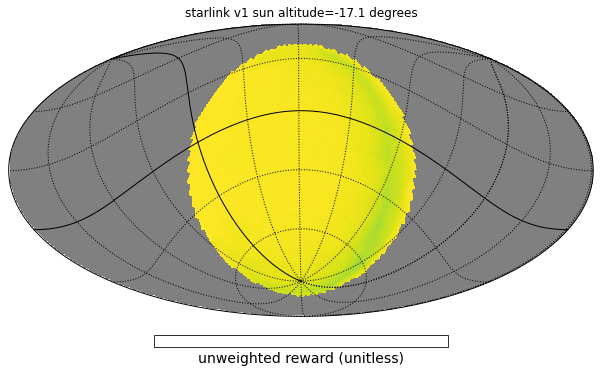

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


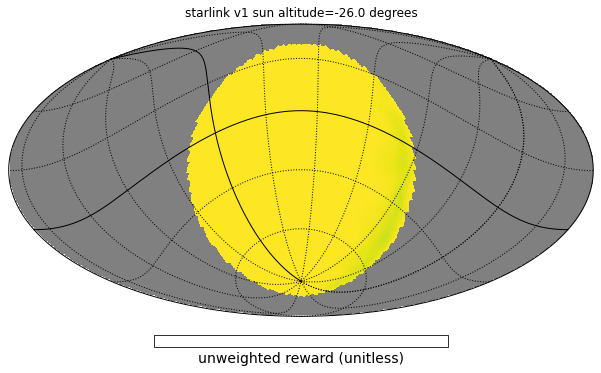

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


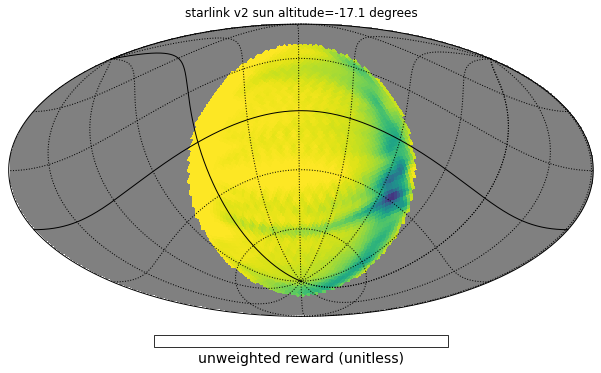

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


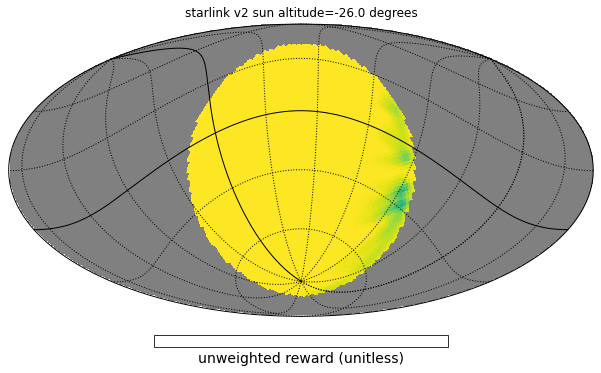

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


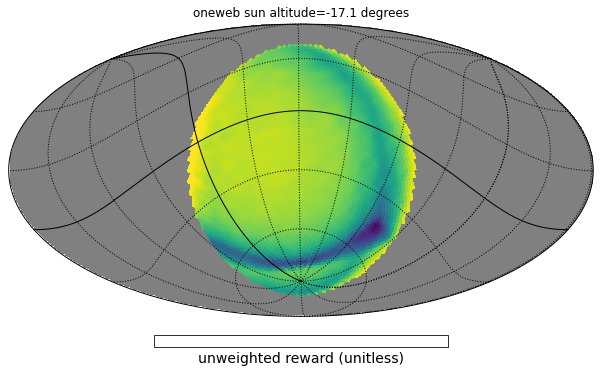

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


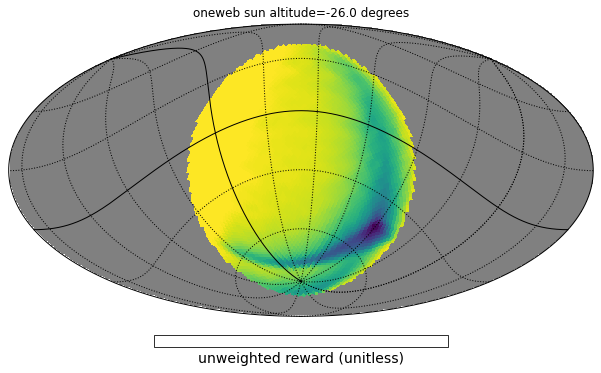

In [2]:
# Takes a freaking long time to run, because the observatory is predicting things for a full night I think.
for constellation_name in ['starlink_tles_v1', 'starlink_tles_v2', 'oneweb_tles']:

    func = getattr(sat_utils, constellation_name)
    tles = func()
    constellation = sat_utils.Constellation(tles)
    
    mo = Model_observatory(constellation=constellation)
    for tstep in [0, .03]:
        mo.mjd += tstep
        conditions = mo.return_conditions()
        bf = Satellite_avoid_basis_function()
        sat_map = bf(conditions)
        
        below = np.where(conditions.alt < np.radians(20))[0]
        sat_map[below] = np.nan

        title = constellation_name.replace('_tles', '').replace('_', ' ')
        title += ' sun altitude=%.1f degrees' % np.degrees(conditions.sunAlt)
        hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)
        plt.savefig(constellation_name+'_%.1f_basisfunc.pdf' % tstep)
        hp.graticule()

/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2662: RuntimeWarning: divide by zero encountered in double_scalars
  x_scale = 1.0 / inw
/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/matplotlib/transforms.py:2664: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx = np.array([[x_scale, 0.0    , (-inl*x_scale)],
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


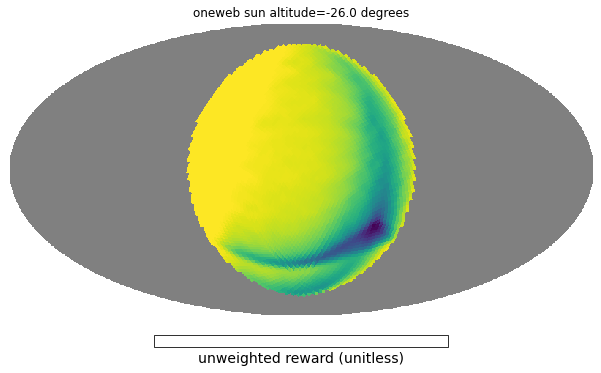

In [3]:
hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)

In [4]:
sat_map = bf(conditions)
below = np.where(conditions.alt < np.radians(20))[0]
sat_map[below] = np.nan

posx and posy should be finite values
posx and posy should be finite values
0.0 180.0 -180.0 180.0
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


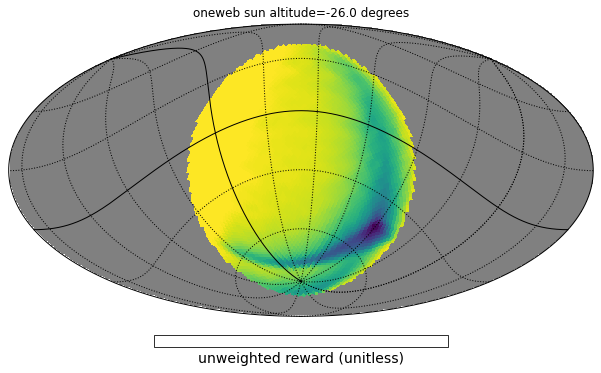

In [5]:
hp.mollview(sat_map, rot=(conditions.lmst*180/12., conditions.site.latitude),
                    title=title, unit='unweighted reward (unitless)', min=-18, max=0)
hp.graticule()